In [94]:
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [95]:
df = pd.read_csv('desastresNaturales.csv')

In [96]:
df.describe()

,Year,Seq,Aid Contribution,Dis Mag Value,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI
count,14644.000000,14644.000000,6.770000e+02,4.569000e+03,14644.000000,14376.000000,11577.000000,14644.000000,14095.000000,11650.000000,10199.000000,3.651000e+03,8.846000e+03,2.249000e+03,1.104100e+04,3.100000e+01,1.094000e+03,4.863000e+03,14329.000000
mean,2001.596422,731.604958,1.254136e+05,5.093532e+04,2001.606323,6.411241,15.207912,2001.655763,6.549273,15.792618,361.813119,2.486686e+03,8.889099e+05,7.229559e+04,7.277392e+05,2.392251e+06,7.999424e+05,7.746866e+05,68.762532
std,12.538572,1912.021531,2.997875e+06,3.211007e+05,12.535872,3.393997,8.964592,12.537387,3.351351,8.872079,6495.045853,3.402404e+04,8.680288e+06,5.271422e+05,7.851210e+06,5.229397e+06,3.060283e+06,4.901266e+06,21.429182
min,1970.000000,1.000000,1.000000e+00,-5.700000e+01,1970.000000,1.000000,1.000000,1970.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,8.400000e+01,3.400000e+01,2.000000e+00,15.001282
25%,1993.000000,130.000000,1.750000e+02,7.000000e+00,1993.000000,4.000000,7.000000,1993.000000,4.000000,8.000000,5.000000,1.200000e+01,1.200000e+03,5.140000e+02,6.320000e+02,1.200000e+04,5.000000e+04,1.000000e+04,55.816107
50%,2003.000000,304.000000,7.210000e+02,1.800000e+02,2003.000000,7.000000,15.000000,2003.000000,7.000000,16.000000,16.000000,5.000000e+01,1.000000e+04,3.000000e+03,5.736000e+03,1.940000e+05,1.725000e+05,7.100000e+04,69.500473
75%,2012.000000,503.000000,3.511000e+03,1.515000e+04,2012.000000,9.000000,23.000000,2012.000000,9.000000,24.000000,50.000000,2.000000e+02,8.855250e+04,1.600000e+04,5.600000e+04,1.520376e+06,5.000000e+05,3.500000e+05,86.912465
max,2021.000000,9881.000000,7.800000e+07,1.302587e+07,2021.000000,12.000000,31.000000,2021.000000,12.000000,31.000000,300000.000000,1.800000e+06,3.300000e+08,1.585000e+07,3.300000e+08,2.500000e+07,6.000000e+07,2.100000e+08,100.000000


In [97]:
df.dtypes

Dis No                              object
Year                                 int64
Seq                                  int64
Glide                               object
Disaster Group                      object
Disaster Subgroup                   object
Disaster Type                       object
Disaster Subtype                    object
Disaster Subsubtype                 object
Event Name                          object
Country                             object
ISO                                 object
Region                              object
Continent                           object
Location                            object
Origin                              object
Associated Dis                      object
Associated Dis2                     object
OFDA Response                       object
Appeal                              object
Declaration                         object
Aid Contribution                   float64
Dis Mag Value                      float64
Dis Mag Sca

In [98]:
df = df.drop(['No Homeless','Associated Dis','Associated Dis2','Appeal','Declaration','Aid Contribution','River Basin','Local Time'], axis=1)

In [99]:
df = df.drop(['Dis No','Glide','ISO','Event Name'], axis=1)

In [100]:
df = df.drop(['CPI', 'Adm Level','Admin1 Code','Admin2 Code'], axis=1)

In [101]:
gruop = df['Disaster Group'].unique()
gruop

array(['Natural'], dtype=object)

In [102]:
df['Disaster Group'].fillna(0, inplace=True)

In [103]:
df['Disaster Group'] = df['Disaster Group'].map({'Natural': 1})

In [104]:
Subgroup = df['Disaster Subgroup'].unique()
Subgroup

array(['Hydrological', 'Meteorological', 'Climatological', 'Geophysical',
       'Biological', 'Extra-terrestrial'], dtype=object)

In [105]:
df['Disaster Subgroup'] = df['Disaster Subgroup'].map({'Hydrological': 1,'Meteological':2,'Climatological':3,'Geophysical':4,
       'Biological':5, 'Extra-terrestrial': 6})

In [106]:
type = df['Country'].unique()
type

array(['Argentina', 'Australia', 'Benin', 'Bangladesh', 'Brazil',
       'Barbados', 'Botswana', 'Canada', 'Switzerland', 'China',
       'Côte d’Ivoire', 'Colombia', 'Costa Rica', 'Cuba', 'Cyprus',
       'Dominica', 'Ecuador', 'Ethiopia', 'France', 'Guadeloupe',
       'Hong Kong', 'Hungary', 'Indonesia', 'India', 'Chile',
       'Afghanistan', 'Belgium', 'Cameroon', 'Spain', 'Ghana', 'Guyana',
       'Honduras', 'Germany Fed Rep', 'Fiji',
       'United Kingdom of Great Britain and Northern Ireland (the)',
       'Haiti', 'Central African Republic', 'Algeria', 'Gambia (the)',
       'Guatemala', 'Belize', 'Bolivia (Plurinational State of)',
       'Czechoslovakia', 'Austria', 'Egypt', 'Grenada', 'Burkina Faso',
       'Denmark', 'Guam', 'Bulgaria', 'Comoros (the)', 'Djibouti',
       'Greece', 'Burundi', 'Bahrain', 'Peru', 'Papua New Guinea',
       'Iran (Islamic Republic of)', 'Israel', 'Italy',
       'Korea (the Republic of)', 'Morocco', 'Madagascar', 'Mexico',
       'Myanmar',

In [107]:
type = df['Origin'].unique()
type

array([nan, 'Typhoon ', 'Heavy rains', 'Landslide', 'Heavy rain',
       'Earthquake and landslide', 'Famine', 'El Nino',
       'Extra-tropical cyclone', 'Brief torrential rain',
       'Heavy rains and thunderstorms', 'Monsoonal rain',
       'Monssonal rain', 'Heavy rains, tremor', 'Brief torrential rains',
       'Monsoon rain', 'Tropical cyclone', 'Drought period',
       'Prolonged drought', 'Monsoon rains',
       'Volcanic activity, tropical rainstorms and ash from the eruptions',
       'monsoonal rain', 'Heavy rain and Snowmelt',
       'Snowmelt and Heavy rains', 'Rain, snowmelt', 'Earthquake',
       'Snowmelt', 'Hevay rain', 'Typhoon Gali', 'Mosoonal rain',
       'Heavy rain and brief torrential rain',
       'Breakdown water supply, poor hygiene practices and increase of number of displaced perdons',
       'Flood', 'Heavy rains, melting snow', 'Continous rainfall',
       'Snow storm and heavy winds', 'Rain and snowmelt', 'Lack rainfall',
       'Food consumed', 'El Nin

In [108]:
df['Disaster Type'] = df['Disaster Type'].map({'Flood':1, 'Storm':2, 'Drought':3, 'Landslide':4, 'Earthquake':5, 'Epidemic':6,
       'Wildfire':7, 'Mass movement (dry)':8, 'Extreme temperature':9,
       'Volcanic activity':10, 'Insect infestation':11, 'Impact':12,
       'Animal accident':13, 'Glacial lake outburst':14})

In [109]:
df = df.drop(['Geo Locations'], axis=1)

In [110]:
type = df['Region'].unique()
type

array(['South America', 'Australia and New Zealand', 'Western Africa',
       'Southern Asia', 'Caribbean', 'Southern Africa',
       'Northern America', 'Western Europe', 'Eastern Asia',
       'Central America', 'Western Asia', 'Eastern Africa',
       'Eastern Europe', 'South-Eastern Asia', 'Middle Africa',
       'Southern Europe', 'Melanesia', 'Northern Europe',
       'Northern Africa', 'Micronesia', 'Polynesia', 'Russian Federation',
       'Central Asia'], dtype=object)

In [111]:
type = df['Continent'].unique()
type

array(['Americas', 'Oceania', 'Africa', 'Asia', 'Europe'], dtype=object)

In [112]:
df['Continent'] = df['Continent'].map({'Americas':1, 'Oceania':2, 'Africa':3, 'Asia':4, 'Europe':5})

In [113]:
type = df['OFDA Response'].unique()
type

array([nan, 'Yes'], dtype=object)

In [114]:
df.dtypes

Year                                 int64
Seq                                  int64
Disaster Group                       int64
Disaster Subgroup                  float64
Disaster Type                      float64
Disaster Subtype                    object
Disaster Subsubtype                 object
Country                             object
Region                              object
Continent                            int64
Location                            object
Origin                              object
OFDA Response                       object
Dis Mag Value                      float64
Dis Mag Scale                       object
Latitude                            object
Longitude                           object
Start Year                           int64
Start Month                        float64
Start Day                          float64
End Year                             int64
End Month                          float64
End Day                            float64
Total Death

In [115]:
df['OFDA Response'] = df['OFDA Response'].map({ 'Yes':1})
df['OFDA Response'].fillna(0, inplace=True)

In [116]:
type = df['Dis Mag Scale'].unique()
type

array(['Km2', 'Kph', nan, 'Richter', 'Vaccinated', '°C'], dtype=object)

In [117]:
df['Dis Mag Scale'] = df['Dis Mag Scale'].map({'Km2':1, 'Kph':2, 'Richter':3, 'Vaccinated':4, '°C':5})
df['Dis Mag Scale'].fillna(0, inplace=True)

In [118]:
df = df.drop(['Longitude','Latitude'], axis=1)

In [119]:
df = df.drop(['Disaster Group'], axis=1)

In [120]:
df.dtypes

Year                                 int64
Seq                                  int64
Disaster Subgroup                  float64
Disaster Type                      float64
Disaster Subtype                    object
Disaster Subsubtype                 object
Country                             object
Region                              object
Continent                            int64
Location                            object
Origin                              object
OFDA Response                      float64
Dis Mag Value                      float64
Dis Mag Scale                      float64
Start Year                           int64
Start Month                        float64
Start Day                          float64
End Year                             int64
End Month                          float64
End Day                            float64
Total Deaths                       float64
No Injured                         float64
No Affected                        float64
Total Affec

In [137]:
df.describe()

,Year,Seq,Disaster Subgroup,Disaster Type,Continent,OFDA Response,Dis Mag Value,Dis Mag Scale,Total Deaths
count,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.000000,6.00000
mean,2010.000000,199.166667,2.833333,4.00000,2.833333,0.666667,17367.666667,2.000000,40104.50000
std,6.480741,192.249231,1.471960,2.44949,2.041241,0.516398,42147.522806,1.095445,89644.84797
min,1999.000000,17.000000,1.000000,1.00000,1.000000,0.000000,7.000000,1.000000,43.00000
25%,2008.500000,80.250000,1.500000,2.00000,1.000000,0.250000,8.000000,1.000000,85.75000
50%,2010.000000,146.500000,3.500000,5.00000,2.500000,1.000000,154.000000,2.000000,411.50000
75%,2014.500000,245.000000,4.000000,5.00000,4.750000,1.000000,437.250000,3.000000,13013.25000
max,2017.000000,549.000000,4.000000,7.00000,5.000000,1.000000,103400.000000,3.000000,222570.00000


In [122]:
df = df.drop(['Disaster Subtype','Disaster Subsubtype','Country','Region','Location','Origin'], axis=1)

In [123]:
df = df.dropna()

In [124]:
df_to_use.dtypes

Dis Mag Value    float64
Dis Mag Scale    float64
Total Deaths     float64
dtype: object

In [125]:
df = df.drop(["Reconstruction Costs ('000 US$)","Insured Damages ('000 US$)","Total Damages ('000 US$)"
,'Total Affected','No Injured','No Affected'], axis=1)

In [126]:
df = df.drop(["Start Year","Start Month","Start Day"
,'End Year','End Month','End Day'], axis=1)

In [147]:
df_to_use = df.drop(["Year","Seq",'Disaster Subgroup','Disaster Type','Continent','OFDA Response'], axis=1)

In [148]:
centers = range(1, 6)

In [149]:
clusters = [KMeans(n_clusters=center) for center in centers]

In [150]:
scores = [model.fit(df_to_use).score(df_to_use) for model in clusters]

c:\Users\Pedro\Desktop\$ Semestres uni\1-2023\algoritmica\PracticoCodo\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Pedro\Desktop\$ Semestres uni\1-2023\algoritmica\PracticoCodo\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Pedro\Desktop\$ Semestres uni\1-2023\algoritmica\PracticoCodo\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Pedro\Desktop\$ Semestres uni\1-2023\algoritmica\PracticoCodo\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning

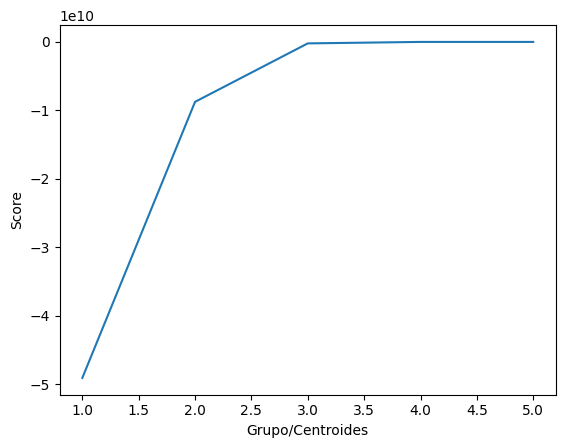

In [151]:
# Aplicamos la curva de Elbow
plt.plot(centers, scores)
plt.xlabel('Grupo/Centroides')
plt.ylabel('Score')
plt.show()

In [152]:
k_means = KMeans(n_clusters=6)

In [153]:
k_means.fit(df_to_use)

c:\Users\Pedro\Desktop\$ Semestres uni\1-2023\algoritmica\PracticoCodo\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [154]:
k_means.cluster_centers_

array([[8.0000e+00, 3.0000e+00, 6.7200e+02],
       [7.0000e+00, 3.0000e+00, 2.2257e+05],
       [1.0340e+05, 1.0000e+00, 1.5100e+02],
       [8.0000e+00, 3.0000e+00, 1.7127e+04],
       [3.0000e+02, 1.0000e+00, 6.4000e+01],
       [4.8300e+02, 1.0000e+00, 4.3000e+01]])

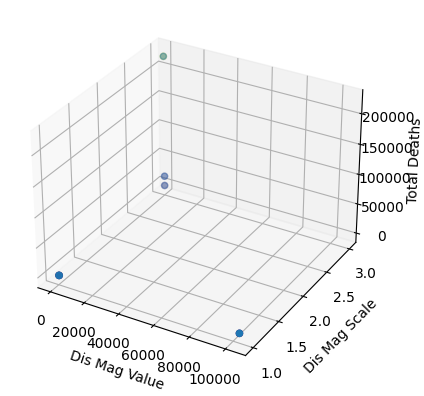

In [155]:
# Visualizaremos los datos de manera tridimensional
# Este grafico es opcional no sera pedido en absolutamente nada
df_array = df_to_use.to_numpy()
figure = plt.figure()
axis = figure.add_subplot(111, projection='3d')
chart = axis.scatter(df_array[:, 0], df_array[:, 1], df_array[:, 2], c=df_array[:, 2])
centroids = axis.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], k_means.cluster_centers_[:, 2])
axis.set_xlabel("Dis Mag Value")
axis.set_ylabel("Dis Mag Scale")
axis.set_zlabel("Total Deaths")
plt.show()

In [156]:
df_to_use

,Dis Mag Value,Dis Mag Scale,Total Deaths
5990,8.0,3.0,17127.0
9174,103400.0,1.0,151.0
10173,7.0,3.0,222570.0
10422,483.0,1.0,43.0
11959,8.0,3.0,672.0
13029,300.0,1.0,64.0


In [157]:
k_means.labels_

array([3, 2, 1, 5, 0, 4])

In [166]:
# Esta es la parte dificil del practico supuestamente
customer_groups = [
    'un poco mas de lo esperado',
    'lo esperado',
    'no tanta suerte',
    'catastrofico',
    'suerte',
    'desastroso'
]

In [160]:
df_to_use

,Dis Mag Value,Dis Mag Scale,Total Deaths
5990,8.0,3.0,17127.0
9174,103400.0,1.0,151.0
10173,7.0,3.0,222570.0
10422,483.0,1.0,43.0
11959,8.0,3.0,672.0
13029,300.0,1.0,64.0


In [167]:
valor = 8
escala=['Km2', 'Kph', 'Richter', 'Vaccinated', '°C']
escalar = 2
muertes = 26834
predicted = k_means.predict([[valor, escalar, muertes]])
print(f'Hubo un accidente de {valor} con la escala {escala[escalar]} y murieron un total {muertes}, fue un accidente {customer_groups[predicted[0]]}')

Hubo un accidente de 8 con la escala Richter y murieron un total 26834, fue un accidente catastrofico


c:\Users\Pedro\Desktop\$ Semestres uni\1-2023\algoritmica\PracticoCodo\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
